<a href="https://colab.research.google.com/github/thdk13/deep-learning/blob/master/boston_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras


Using TensorFlow backend.


In [2]:
from  keras.datasets import boston_housing
(train_data, train_label),(test_data, test_label)=boston_housing.load_data()


57344/57026 [==============================] - 0s 2us/step


In [6]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [7]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [9]:
train_label

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
# normalize data
mean = train_data.mean(axis=0)
train_data -=mean
std = train_data.std(axis=0)
train_data /=std
test_data-=mean
test_data/=std

In [0]:
#model definition
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64,activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [14]:
#K-fold validation
k = 4
num_val_sample = len(train_data)//k
num_epochs = 100
all_score = []
#data from partition# k
for i in range(k):
  print('processing fold:', i)
  val_data = train_data[i*num_val_sample:(i+1)*num_val_sample]
  val_target = train_label[i*num_val_sample:(i+1)*num_val_sample]
  partial_train_data= np.concatenate([train_data[:i*num_val_sample],train_data[(i+1)*num_val_sample:]],axis = 0)
  partial_train_label = np.concatenate([train_label[:i*num_val_sample],train_label[(i+1)*num_val_sample:]],axis = 0)
  model = build_model()
  model.fit(partial_train_data,partial_train_label,epochs=num_epochs,batch_size =1,verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
  all_score.append(val_mae)



processing fold: 0








processing fold: 1
processing fold: 2
processing fold: 3


In [15]:
all_score

[2.0447127276127883,
 2.5055640570007927,
 2.4252142434072965,
 2.3288365932974484]

In [16]:
#save the validation log at each fold:
num_epochs = 500
all_mae_histories =[]
for i in range(k):
  print('processing fold:', i)
  val_data = train_data[i*num_val_sample:(i+1)*num_val_sample]
  val_target = train_label[i*num_val_sample:(i+1)*num_val_sample]
  partial_train_data= np.concatenate([train_data[:i*num_val_sample],train_data[(i+1)*num_val_sample:]],axis = 0)
  partial_train_label = np.concatenate([train_label[:i*num_val_sample],train_label[(i+1)*num_val_sample:]],axis = 0)
  model = build_model()
  history=model.fit(partial_train_data,partial_train_label,validation_data = [val_data,val_target],epochs=num_epochs,batch_size =1,verbose = 0)
  mae_histoy = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_histoy)


processing fold: 0
processing fold: 1
processing fold: 2
processing fold: 3


In [0]:
#building the historyhistory of successsuccessive mean K foldfold
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


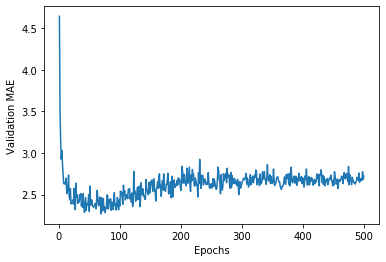

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()